In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

In [50]:
df = pd.read_csv("houseprice.csv", index_col="Id")

df.shape

(1460, 80)

In [51]:
# No data is missing
missing_df = df.isna().mean()

missing_df[missing_df > 0].sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64

In [52]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [53]:
df["MSSubClass"].nunique()

15

In [54]:
df["MSSubClass"].isna().mean()

0.0

<Axes: >

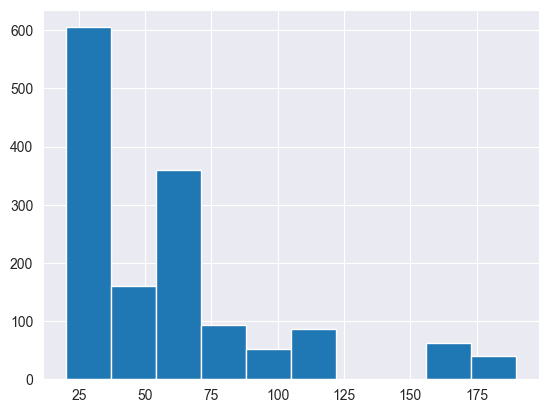

In [55]:
df["MSSubClass"].hist()

<Axes: xlabel='MSSubClass', ylabel='SalePrice'>

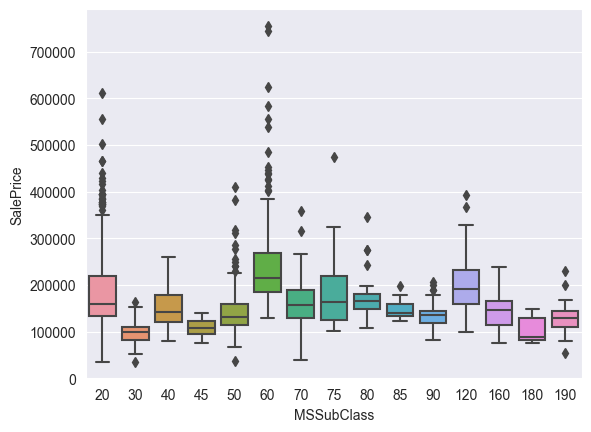

In [56]:
sns.boxplot(df, x="MSSubClass", y="SalePrice")

In [57]:
df["MSZoning"].nunique()

5

In [58]:
df["MSZoning"].isna().mean()

0.0

<Axes: xlabel='MSZoning', ylabel='SalePrice'>

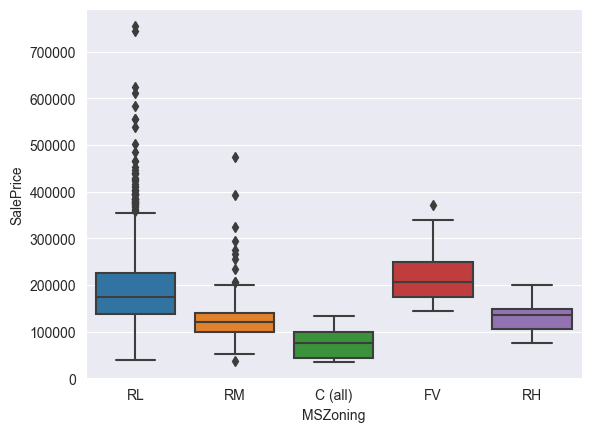

In [59]:
sns.boxplot(df, x="MSZoning", y="SalePrice")

In [60]:
df["LotFrontage"].nunique()

110

In [61]:
df["LotFrontage"].isna().mean()

0.1773972602739726

<Axes: xlabel='LotFrontage', ylabel='Count'>

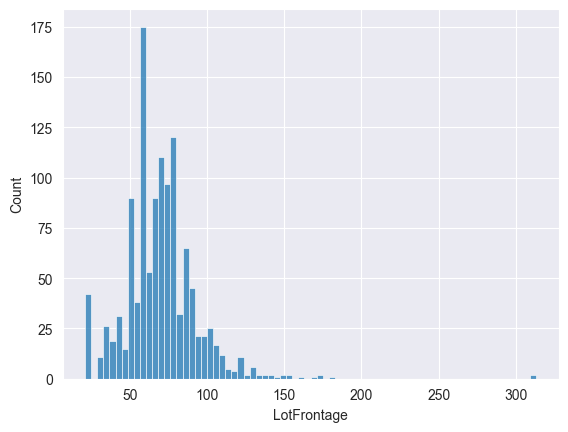

In [62]:
sns.histplot(df["LotFrontage"])

<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

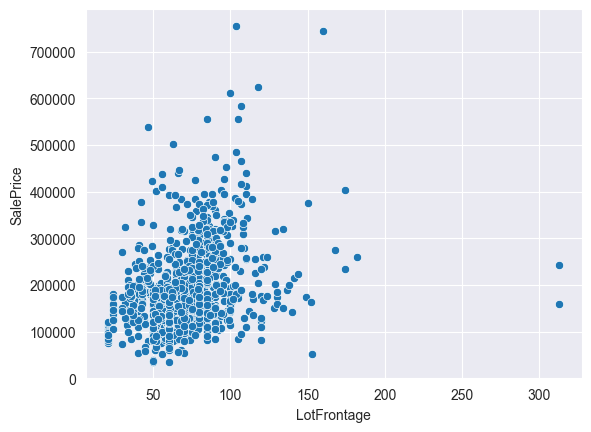

In [63]:
sns.scatterplot(df, x="LotFrontage", y="SalePrice")

In [64]:
df["LotArea"].nunique()

1073

In [65]:
df["LotArea"].isna().mean()

0.0

<Axes: xlabel='LotArea', ylabel='Count'>

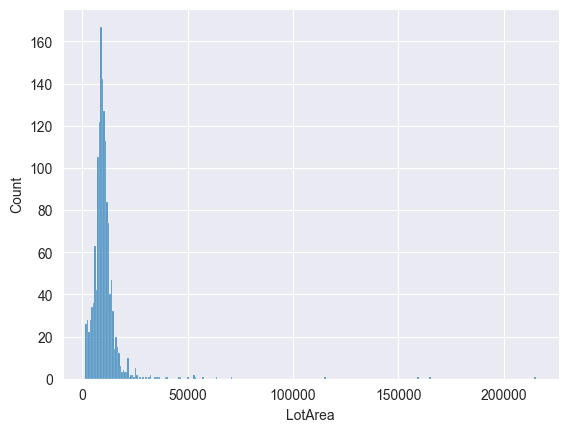

In [66]:
sns.histplot(df, x="LotArea")

<Axes: xlabel='LotArea', ylabel='SalePrice'>

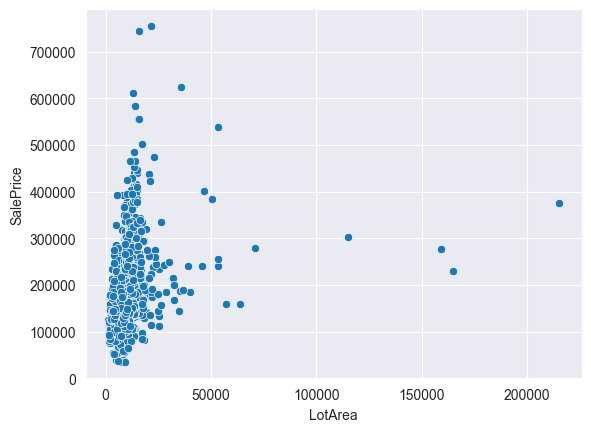

In [67]:
sns.scatterplot(df, x="LotArea", y="SalePrice")

In [68]:
df["Street"].nunique(dropna=False)

2

In [69]:
df["Street"].isna().mean()

0.0

In [70]:
df['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

<Axes: xlabel='Street', ylabel='SalePrice'>

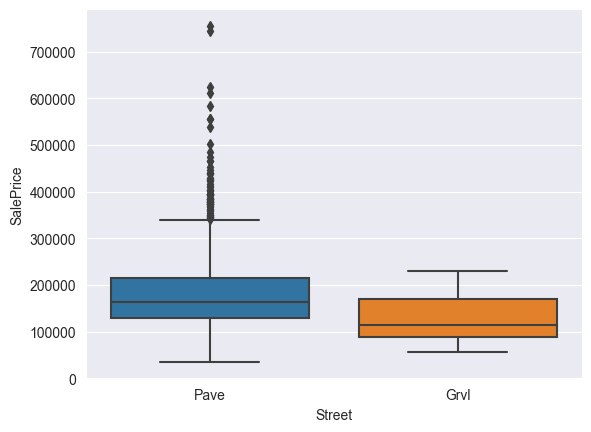

In [71]:
sns.boxplot(df, x="Street", y="SalePrice")

In [72]:
df["Alley"].nunique()

2

In [73]:
df["Alley"].isna().mean()

0.9376712328767123

In [74]:
df["Alley"].value_counts(dropna=False)

Alley
NaN     1369
Grvl      50
Pave      41
Name: count, dtype: int64

<Axes: xlabel='Alley', ylabel='SalePrice'>

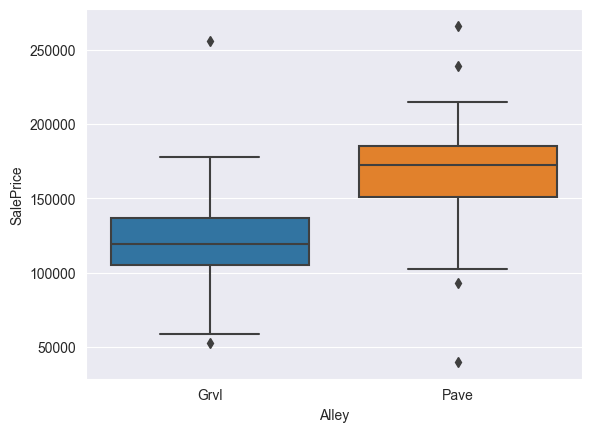

In [75]:
sns.boxplot(df, x="Alley", y="SalePrice")

In [76]:
df["LotShape"].nunique()

4

In [77]:
df["LotShape"].value_counts(dropna=False, normalize=True)

LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: proportion, dtype: float64

<Axes: xlabel='LotShape', ylabel='SalePrice'>

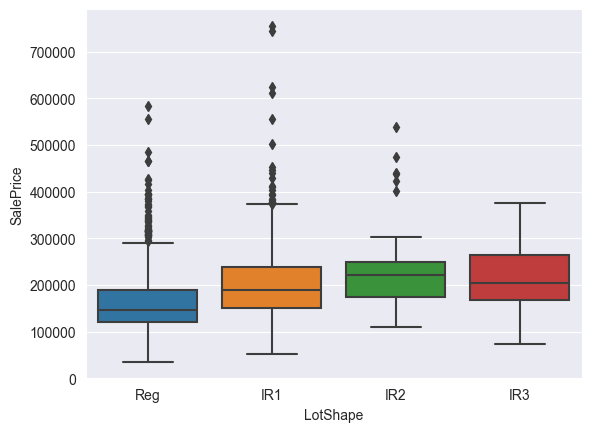

In [78]:
sns.boxplot(df, x="LotShape", y="SalePrice")

In [79]:
df["LandContour"].nunique()

4

In [80]:
df["LandContour"].value_counts(dropna=False, normalize=True)

LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: proportion, dtype: float64

<Axes: xlabel='LandContour', ylabel='SalePrice'>

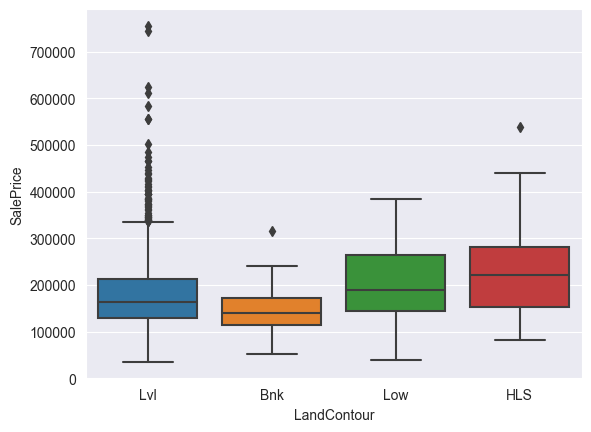

In [81]:
sns.boxplot(df, x="LandContour", y="SalePrice")

In [82]:
df["Utilities"].nunique()

2

In [83]:
df["Utilities"].value_counts(dropna=False, normalize=True)

Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: proportion, dtype: float64

<Axes: xlabel='Utilities', ylabel='SalePrice'>

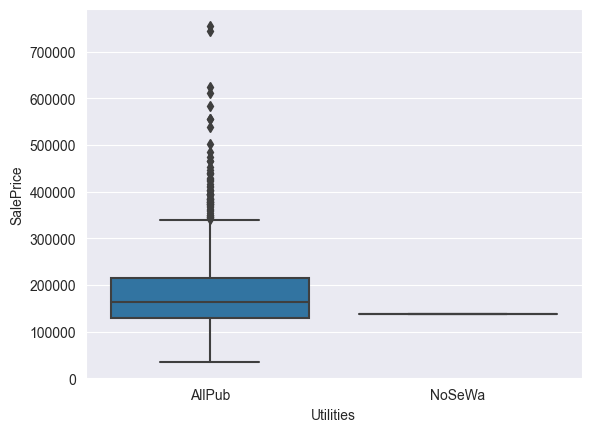

In [84]:
sns.boxplot(df, x="Utilities", y="SalePrice")

In [85]:
df["LotConfig"].nunique()

5

In [86]:
df["LotConfig"].value_counts(dropna=False, normalize=True)

LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: proportion, dtype: float64

<Axes: xlabel='LotConfig', ylabel='SalePrice'>

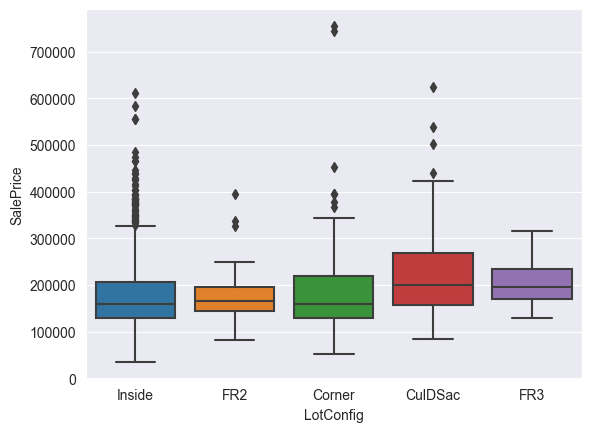

In [87]:
sns.boxplot(df, x="LotConfig", y="SalePrice")

In [88]:
df["LandSlope"].nunique()

3

In [89]:
df["LandSlope"].value_counts(dropna=False, normalize=True)

LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: proportion, dtype: float64

<Axes: xlabel='LandSlope', ylabel='SalePrice'>

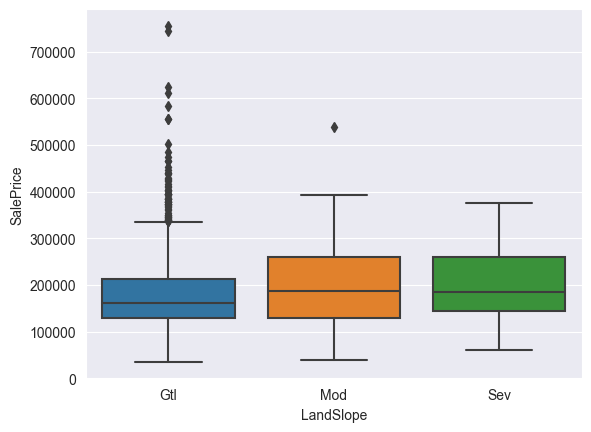

In [90]:
sns.boxplot(df, x="LandSlope", y="SalePrice")

In [91]:
df["Neighborhood"].nunique()

25

In [92]:
df["Neighborhood"].value_counts(dropna=False, normalize=True)

Neighborhood
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
StoneBr    0.017123
SWISU      0.017123
MeadowV    0.011644
Blmngtn    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: proportion, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

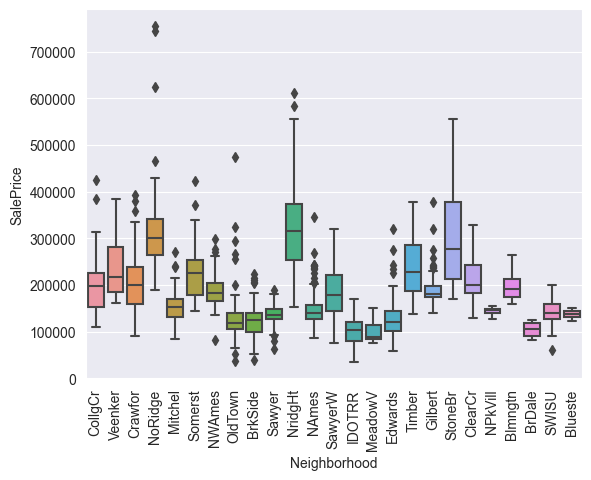

In [93]:
sns.boxplot(df, x="Neighborhood", y="SalePrice")
plt.xticks(rotation=90)

In [94]:
df.groupby("Neighborhood").SalePrice.agg(["median", "count"]).sort_values(by="median", ascending=False)

,median,count
Neighborhood,,
NridgHt,315000.0,77
NoRidge,301500.0,41
StoneBr,278000.0,25
Timber,228475.0,38
Somerst,225500.0,86
Veenker,218000.0,11
Crawfor,200624.0,51
ClearCr,200250.0,28
CollgCr,197200.0,150


In [95]:
ineighborhoods = df.groupby("Neighborhood").SalePrice.median().sort_values().index
neighborhoods_to_order = {n: o for o, n in enumerate(neighborhoods, start=0)}

df["OrderedNeighborhoods"] = df.Neighborhood.map(neighborhoods_to_order)

sns.scatterplot(df, x="OrderedNeighborhoods", y="SalePrice")

NameError: name 'neighborhoods' is not defined

In [ ]:
df["Condition1"].value_counts(dropna=False, normalize=True)

In [ ]:
sns.boxplot(df, x="Condition1", y="SalePrice")

In [ ]:
df["Condition2"].value_counts(dropna=False, normalize=True)

In [ ]:
sns.boxplot(df, x="Condition2", y="SalePrice")

In [ ]:
df["BldgType"].value_counts(dropna=False, normalize=True)

In [ ]:
sns.boxplot(df, x="BldgType", y="SalePrice")

In [ ]:
df["HouseStyle"].value_counts(dropna=False, normalize=True)

In [ ]:
sns.boxplot(df, x="HouseStyle", y="SalePrice")

In [ ]:
df["OverallQual"].value_counts()

In [ ]:
df["OverallQual"].nunique()

In [ ]:
sns.scatterplot(df, x="OverallQual", y="SalePrice")

In [ ]:
data = df.copy()
data["OverallQual"] = data["OverallQual"].apply(lambda x: x ** 2)
sns.scatterplot(data, x="OverallQual", y="SalePrice")

In [ ]:
# OverallCond

In [ ]:
df["OverallCond"].value_counts()

In [ ]:
df["OverallCond"].nunique()

In [ ]:
sns.scatterplot(df, x="OverallCond", y="SalePrice")

In [ ]:
sns.histplot(df, x="OverallCond")

In [103]:
df["YearBuilt"].value_counts()

YearBuilt
2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: count, Length: 112, dtype: int64

In [104]:
df["YearBuilt"].nunique()

112

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

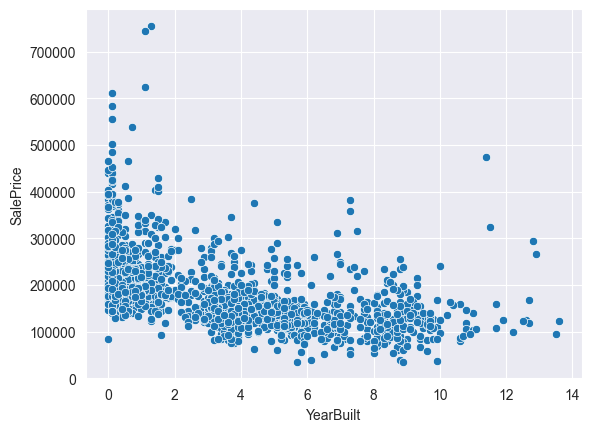

In [116]:
data = df.copy()
data["YearBuilt"] = (data["YrSold"] - data["YearBuilt"]) / 10
sns.scatterplot(data, x="YearBuilt", y="SalePrice")

In [ ]:
df["YearRemodAdd"].nunique()

In [ ]:
sns.histplot(df, x="YearRemodAdd")

In [ ]:
sns.scatterplot(df, x="YearRemodAdd", y="SalePrice")

In [ ]:
df[df["YearRemodAdd"] == 1950].isna().mean()

In [ ]:
# RoofStyle

In [ ]:
df["RoofStyle"].nunique()

In [ ]:
df["RoofStyle"].value_counts()

In [ ]:
sns.boxplot(df, x="RoofStyle", y="SalePrice")

In [ ]:
df["RoofMatl"].nunique()

In [ ]:
df["RoofMatl"].value_counts()

In [ ]:
sns.histplot(df, x="RoofMatl")

In [ ]:
df["Exterior1st"].nunique()

In [ ]:
df["Exterior1st"].value_counts()

In [ ]:
sns.boxplot(df, x="Exterior1st", y="SalePrice")
plt.xticks(rotation=90)
None

In [ ]:
df["Exterior2nd"].nunique()

In [ ]:
df["Exterior2nd"].value_counts()

In [ ]:
sns.boxplot(df, x="Exterior2nd", y="SalePrice")
plt.xticks(rotation=90)
None

In [ ]:
df.reset_index().groupby(["Exterior1st", "Exterior2nd"]).agg({"SalePrice": ["count", "median", "min", "max", "std"]})

In [ ]:
df["MasVnrType"].value_counts(dropna=False)

In [ ]:
df["MasVnrType"] = df["MasVnrType"].fillna("None")
sns.boxenplot(df, x="MasVnrType", y="SalePrice")

In [ ]:
df["MasVnrArea"].value_counts(dropna=False)

In [ ]:
sns.scatterplot(df, x="MasVnrArea", y="SalePrice")

In [ ]:
df[df["MasVnrArea"] == 0].shape

In [ ]:

data = df.copy()
data["MasVnrType"] = data.apply(lambda x: "None" if x.MasVnrArea == 0 else x.MasVnrType, axis=1)
data["MasVnrArea"] = np.sqrt(data["MasVnrArea"])
facet = sns.FacetGrid(data=data, dropna=False, col="MasVnrType")
facet.map_dataframe(sns.regplot, x="MasVnrArea", y="SalePrice")


In [ ]:
df["ExterQual"].value_counts(dropna=False)

In [ ]:
sns.boxplot(df, x="ExterQual", y="SalePrice")

In [ ]:
df["ExterCond"].value_counts(dropna=False)

In [ ]:
sns.boxplot(df, x="ExterCond", y="SalePrice")

In [ ]:
sns.boxplot(x=df.apply(lambda r: f"{r.ExterCond}{r.ExterQual}", axis=1), y=df.SalePrice)

In [ ]:
sns.histplot(x=df.apply(lambda r: f"{r.ExterCond}{r.ExterQual}", axis=1))

In [ ]:
df["Foundation"].value_counts(dropna=False)

In [ ]:
sns.boxplot(df, x="Foundation", y="SalePrice")

In [ ]:
# TotalBsmtSF

In [ ]:
# has na
df["TotalBsmtSF"].isna().mean()

In [ ]:
df["TotalBsmtSF"].value_counts()

/var/folders/bs/b7vb179x0l1_td82gs4zs_gr0000gn/T/ipykernel_2944/1577222596.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_basement["TotalBsmtSF"] = has_basement.loc[:, ["TotalBsmtSF"]].apply(np.sqrt)


<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

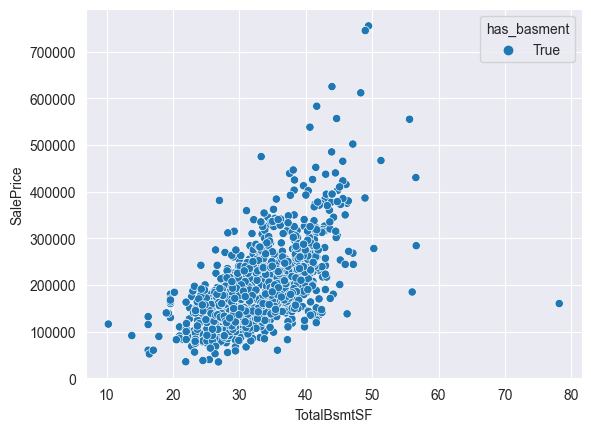

In [97]:
data = df.copy()
data["has_basment"] = data["TotalBsmtSF"].gt(0)
has_basement = data[data["has_basment"]]
has_basement["TotalBsmtSF"] = has_basement.loc[:, ["TotalBsmtSF"]].apply(np.sqrt)
sns.scatterplot(has_basement, x="TotalBsmtSF", y="SalePrice", hue="has_basment")

<Axes: xlabel='TotalBsmtSF', ylabel='Count'>

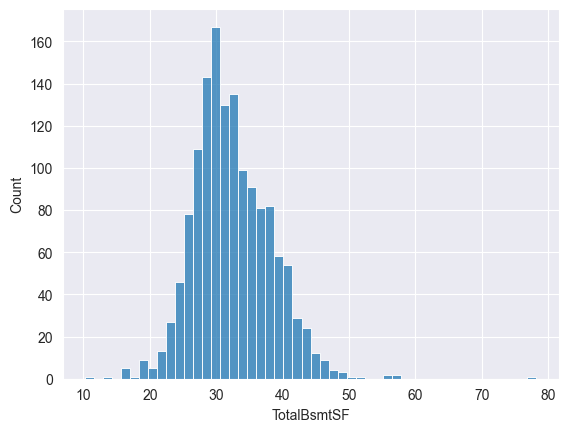

In [98]:
sns.histplot(has_basement, x="TotalBsmtSF")

In [101]:
# GrLivArea

df["GrLivArea"].isna().mean()

0.0

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

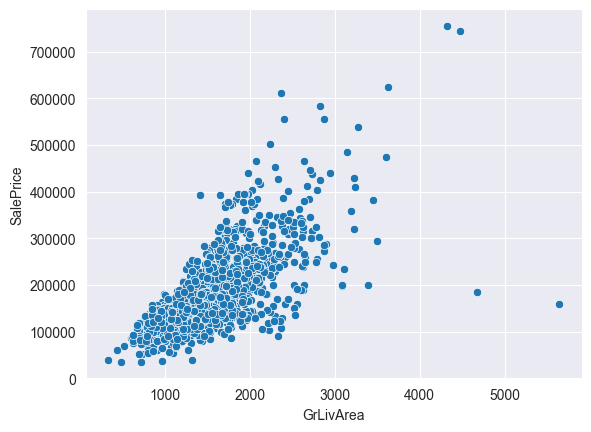

In [102]:
sns.scatterplot(df, x="GrLivArea", y="SalePrice")

In [ ]:
# BsmtFullBath

In [ ]:
df["BsmtFullBath"].value_counts(dropna=False)

In [ ]:
sns.boxenplot(df, x="BsmtFullBath", y="SalePrice")

In [96]:
cats = df.select_dtypes(include="object").columns
numerical = df.select_dtypes(exclude="object").columns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

oe = OrdinalEncoder()
ct = ColumnTransformer(transformers=[("cats", oe, cats)], remainder="passthrough")
pipe = make_pipeline(ct)

pipe.set_output(transform="pandas")
results = pipe.fit_transform(df.drop("SalePrice", axis=1)).fillna(-999)

pd.DataFrame({"mi": mutual_info_regression(results, df["SalePrice"]), "col": pipe.get_feature_names_out()}).sort_values(by="mi", ascending=False)

,mi,col
46,0.564051,remainder__OverallQual
8,0.513898,cats__Neighborhood
58,0.481430,remainder__GrLivArea
48,0.366345,remainder__YearBuilt
54,0.366130,remainder__TotalBsmtSF
...,...,...
73,0.000000,remainder__3SsnPorch
2,0.000000,cats__Alley
76,0.000000,remainder__MiscVal
77,0.000000,remainder__MoSold
